# **Q2: which countries are making the biggest strides in decreasing CO<sub>2</sub> output?**

You'll need to find the relative CO<sub>2</sub> output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

# **Data preperation**

## Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

## Functions used

Function to create a graph of the 10 best scoring countries in lowering the CO₂ emmission per capita in 2020 according to 1990

(used for **Q2a**)

In [2]:
# Used with Q2a
# Show a graph of the 10 best scoring countries in lowering the CO2 emmission per capita in 2020 according to 1990:
def show_graph(df):
    # # Set the figure size
    # plt.figure(figsize=(12, 6))

    # Create the line graph (itterrows)
    years = df.columns[2:]

    for index, row in df.iterrows():
        plt.plot(years, row[2:], label=row[0])

    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Percentage CO₂ emission per capita\n(1990 set to 100%)')
    plt.title('Top 10 best performing entities\nin reducing CO₂ emission per capita in 2020 according to 1990' )

    # Add a legend outside the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Display the graph
    plt.show()

# Call the function with:
# show_graph(df_10_most_decreased_countries_CO2_output)

Function to create a graph of the top 10 countries/entities with the best reduction in CO₂ emission per capita.

As an argument the number of megatonnes is needed for which the country in 2020 has a minimal emission of CO₂ per capita

(used with **Q2b**)

In [3]:
# Function to create a graph of the top 10 countries/entities with the greatest reduction in CO2 emissions.
# The 'megatonnes' argument represents the threshold for CO2 emissions.
def set_megatonnes_CO2_emission(megatonnes):
    # Filter countries/entities with CO2 emissions above the specified threshold
    bigger_than_x_megatonnes = df_q2b[df_q2b['co2'] >= megatonnes]

    # Calculate the number of selected countries/entities
    num_selected_entities = len(bigger_than_x_megatonnes)

    # Display the number of selected countries/entities and the threshold in the console
    print(f"There are {num_selected_entities} countries/entities with emissions >= {megatonnes} megatonnes in this dataframe.")

    # Get the unique ISO codes of the selected countries/entities
    unique_iso_codes = bigger_than_x_megatonnes['iso_code'].unique()

    # Filter the 'df_q2a' dataframe based on the unique ISO codes
    filtered_df_q2a = df_q2a[df_q2a['Code'].isin(unique_iso_codes)]

    # Sort values
    filtered_df_q2a = filtered_df_q2a.sort_values('2020')

    # Select the top 10 countries/entities
    top_10_entities = filtered_df_q2a.head(10)

    # print a list of countries in the top 10
    list_countries_top_10_q2b = top_10_entities['Entity']
    list_countries_top_10_q2b = list_countries_top_10_q2b.tolist()
    print(f'The list of top_10_entities (q2b):')
    print(list_countries_top_10_q2b)

    # Create a line graph for the top 10 countries/entities
    # plt.figure(figsize=(12, 6))

    for index, row in top_10_entities.iterrows():
        plt.plot(row.index[2:], row.values[2:], label=row[0])

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Percentage CO₂ emission per capita\n(1990 set to 100%)')
    # plt.title(f'Top 10 countries/entities with the greatest reduction\nCondition: CO₂ emission > {megatonnes} megaton in 2020')
    plt.title(f'Top 10 best performing entities\nin reducing CO₂ emission per capita in 2020 according to 1990\nCondition: CO₂ emission in 2020 >= {megatonnes} megaton')

    # Add a legend outside the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Display the graph
    plt.show()

# Call the function with, for example:
# set_megatonnes_CO2_emission(megatonnes=5)

Function to create a graph from a dataframe showing the top 10 best-performing entities in the recent years (1,2,3,5,10) in terms of reduction in CO₂ emissions compared to the year 2021.

(Used with **Q2c**)

In [4]:
# Used in Q2c
# Function to create a graph from a dataframe showing the top 10 performing 'Entities'
# in terms of CO2 emission reduction compared to the year 2021.
# The argument can be the year for comparison.
# This argument is passed as both a string and a number.

def show_figure_sorted_by(df, year_string_for_comparison, year_number_for_comparison):
    # Sort the dataframe by the specified year column (e.g., 'year_q2c') in descending order
    df = df.sort_values(year_string_for_comparison, ascending=False)

    # Select the top 10 rows
    df_top_10 = df.head(10)

    time_span = 2021 - year_number_for_comparison

    # Create a graph of the top 10 best performing entities in the specified year:
    years = df_top_10.columns[2:]

    for index, row in df_top_10.iterrows():
        plt.plot(years, row[2:], label=row[0])

    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Percentage CO₂ emission per capita\n(2021 set to 100%)')
    plt.title(f'Top 10 best performing entities\nin reducing CO₂ emission per capita in 2021 according to {year_number_for_comparison}\nTime Span: {time_span} years')
    # Add a legend outside the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Display the graph
    plt.show()

# Usage example with a timespan of one year:
# show_figure_sorted_by(df_q2c, '2020', 2020)

Function to show graphs of the 'Annual CO₂ emissions (per capita)' for the different entities during the years 1990-2021
(Used in Appendix)

In [5]:
def show_graphs_of_countries(country_name_list):
    rows = len(country_name_list) // 3 + (1 if len(country_name_list) % 3 != 0 else 0)
    cols = 3

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

    for i, country_name in enumerate(country_name_list):
        ax = axes[i // 3, i % 3] if rows > 1 else axes[i % 3]

        grouped_df = df_CO2_per_capita.groupby('Entity')
        df = grouped_df.get_group(country_name)

        # Filter on years 1990 and 2021
        filtered_df = df[(df['Year'] >= 1990) & (df['Year'] <= 2021)]

        # Make line graph
        ax.plot(filtered_df['Year'], filtered_df['Annual CO₂ emissions (per capita)'], marker='o')

        # Years as x-axis ticks
        xticks_range = range(1990, 2021, 5)
        xticks_list = list(xticks_range)
        ax.set_xticks(xticks_list)

        # Title and labels
        ax.set_title(country_name)
        ax.set_xlabel("Year")
        ax.set_ylabel("Annual CO₂ emissions\n(tonnes per capita)")

        # Grid
        ax.grid(True)

    # Remove empty subplots
    if len(country_name_list) % 3 != 0:
        for i in range(len(country_name_list) % 3, 3):
            fig.delaxes(axes[-1, i])

    # Adjust layout
    plt.tight_layout()

    # Show graphs
    plt.show()

# Call the function with list of country names
# show_graph_of_country(list_countries_top_10_q2a)

## Data Acquisition

In [6]:
# Base url
base_url = 'https://raw.githubusercontent.com/nicolette1/7_3_4_Final-assignment---CO2-emissions/main/'

# Import urls
url_co2_capita = f'{base_url}co-emissions-per-capita.csv'
url_co2_data = f'{base_url}owid-co2-data.csv'

# Read url's
df_CO2_per_capita = pd.read_csv(url_co2_capita)
df_CO2_data = pd.read_csv(url_co2_data)


# **Approach**

### **Collection of data**

The essential CSV files have been gathered from the 'Our World of Data' website. The data concerning CO₂ emissions per capita is sourced from 'co-emissions-per-capita.csv'. Furthermore, the data necessary to define the threshold for the minimum volume of megatons of CO₂ emissions per country in 2020 is extracted from 'owid-co2-data.csv'.

###**Three different approaches are explored.**

In this analysis, we examine the most substantial percentage decrease in CO₂ emissions per capita across different countries. The choises we make for the comparison could have a great impact on the results. Therefore we decided to look at the data from three different kinds of few.

*   **Q2a Decrease in relative CO₂ emission in 2020 compared to 1990**

>>This approach involves establishing the CO₂ emissions in 1990 as a baseline of 100%. This choice is aligned with the commitments made during the 2015 Paris Climate Agreement, which serve as the cornerstone of the European strategy for combating climate change. The overarching goal of the new climate legislation, in effect since June 30, 2021, is to achieve a 55% reduction in CO2 emissions by 2030 relative to the 1990 levels, applicable across the European Union. Notably, frontrunners have the potential to balance out laggards. (Reference: Europa Nu -(https://www.europa-nu.nl/id/vhesf063wxu9/europese_aanpak_klimaatverandering)-)

>>To provide a comprehensive perspective on the trajectory of CO₂ emissions, we've chosen to assess emissions per capita for each country starting from 1990 and progressing in 5-year intervals until 2020. This approach paints a more nuanced picture of emissions trends over time, beyond merely comparing 2020 and 1990. (It's important to note that while data for 2021 are available, it won't be included in this analysis.)

>>The transformation of the original dataset into an alternative format has been facilitated through a pivot operation.

>>Entities lacking a designated code, as well as global data entries, have been omitted from our analysis. Furthermore, entities with missing values in the 1990 data set have also been excluded. These include Kosovo, Marshall Islands, Micronesia (country), and Timor.

>>The comparison will yield a top 10 list of countries with the most percentage reduction in CO₂ emissions per capita in 2020 compared to 1990.

>>The resultant top 10 countries, showcasing significant reductions in CO₂ emissions per capita in 2020 versus 1990, are visually presented in a graph. The legend distinctly outlines the top 10 countries in their ranked order (as seen in Q2a).


*   **Q2b Decrease in relative CO₂ emission in 2020 compared to 1990, with a variabel condition for a minmal CO₂ emission in 2020**

>>As an extension of the approach outlined above and to focus specifically on countries with a minimal CO₂ emission per capita in 2020, a new function has been developed. This function takes an argument indicating the minimum threshold for CO₂ emission per capita in 2020, required for entry in the top 10 countries.

>>In detail, an additional dataframe is first created (df_q2b), containing CO₂ emission per country for the year 2020 (sourced from the original dataframe df_CO2_data). The developed function utilizes this new dataframe, allowing us to specify the CO₂ emission threshold as an argument. Within the function:

>>>*   The function filters countries that reach or exceed the specified threshold to form a new dataframe.
>>>*   It calculates the number of rows in this filtered dataframe, informing us about the number of entities exceeding the given threshold.
>>>*   It generates a list of unique ISO codes from the filtered dataframe.
>>>*   It creates another dataframe by filtering rows from our original dataframe used in approach Q2a (df_q2a), where values in the 'Code' column match the list of unique ISO codes.
>>>*   It extracts the top 10 countries with the largest decrease in CO₂ emissions from this final filtered dataframe.
>>>*   It generates and displays a line graph to illustrate the percentage change in CO₂ emission per capita for the top 10 countries over the years 1990 to 2020, in 5-year increments.

>>This function allows us to generate specific graphs for countries that meet the specified CO₂ emission threshold, in addition to the graph presented in Q2a.


*   **Q2c Recent Reductions (last 1, 2, 3, 5, and 10 years) in CO₂ Emissions relative to 2021**

>>This approach delves into the recent reduction percentages of CO₂ emissions per capita in the last 1, 2, 3, 5, and 10 years relative to 2021 (the latest year with available data). This perspective is adopted due to the fluctuating nature of CO₂ emission reductions since 1990 for some countries. Reductions sometimes occurred between 1990 and 1995, with even a gradual increase observed between 1995 and 2020.

>>Entities without codes ('Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America'
 'North America (excl. USA)' 'Oceania' 'South America'
 'Upper-middle-income countries') have been removed. The 'World' was already not part of this dataframe.

>>A custom function, 'show_figure_sorted_by,' is employed to visualize this approach. This function sorts the dataframe based on the specified year column, selects the top 10 rows, and generates a line graph illustrating the percentage change in CO₂ emission per capita compared to 2021. The graph's legend highlights the top 10 entities with the best performance in reducing CO₂ emissions per capita according to the chosen year, displaying the time span in years.

>>The approach results in a visual representation of recent efforts in reducing CO₂ emissions, focusing on the top-performing entities over specific time frames relative to 2021.

### **Q2a Decrease in relative CO₂ emission in 2020 compared to 1990**

Provide the top 10 entities that have performed the best in reducing CO₂ emission per capita in 2020 relative to the baseline year 1990.

In [7]:
# Select the years 1990, 1995, 2000, 2005, 2010, 2015, and 2020
years = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
df_CO2_per_capita_selected_years = df_CO2_per_capita[df_CO2_per_capita['Year'].astype(float).isin(years)]

# Use pivot:
df_q2a = df_CO2_per_capita_selected_years.pivot(index=['Entity', 'Code'], columns='Year', values='Annual CO₂ emissions (per capita)').reset_index()

# Ensure column names are always strings
df_q2a.columns = df_q2a.columns.astype(str)

# Remove all the rows where a missing value is present in the 'Code' column.
df_q2a = df_q2a.dropna(subset=['Code'])

# Examine the 1990 column for missing values
missing_percentage = df_q2a['1990'].isnull().mean() * 100
print(f"The percentage of missing values in '1990' is: {missing_percentage:.2f}%")

# Display the countries/entities with missing values in the '1990' column
entities_with_missing_values = df_q2a[df_q2a['1990'].isnull()]['Entity']
print("Entities with missing values in the '1990' column:")
print(entities_with_missing_values)

# Remove the rows where there is a missing value in the '1990' column
df_q2a = df_q2a.dropna(subset=['1990'])

# # Cheque if World is an item in 'Entity'
# df_q2a['Entity'].unique()
# print("The unique Entitys in the 'Entity' column are")
# print(df_q2a['Entity'].unique())

# Remove the row with the value 'World' in the 'Entity' column
df_q2a = df_q2a[df_q2a['Entity'] != 'World']

# Create a new column to set the percentage change in relation to 1990 to 100%
df_q2a.loc[:, '%1990'] = 100

# Calculate the percentage change in relation to 1990 for other years
df_q2a.loc[:, '%1995'] = (df_q2a['1995'].astype(float) / df_q2a['1990'].astype(float)) * 100
df_q2a.loc[:, '%2000'] = (df_q2a['2000'] / df_q2a['1990']) * 100
df_q2a.loc[:, '%2005'] = (df_q2a['2005'] / df_q2a['1990']) * 100
df_q2a.loc[:, '%2010'] = (df_q2a['2010'] / df_q2a['1990']) * 100
df_q2a.loc[:, '%2015'] = (df_q2a['2015'] / df_q2a['1990']) * 100
df_q2a.loc[:, '%2020'] = (df_q2a['2020'] / df_q2a['1990']) * 100

# Sort the dataframe based on the largest decrease relative to 1990 using the '%2020' column and the smallest values
# Use .sort_values
df_q2a = df_q2a.sort_values('%2020')

# Remove unnecessary columns
df_q2a = df_q2a.drop(columns=['1990', '1995', '2000', '2005', '2010', '2015', '2020'])

# Rename the columns
df_q2a.columns = ['Entity', 'Code', '1990', '1995', '2000', '2005', '2010', '2015', '2020']

# The resulting dataframe being used
# df_q2a

The percentage of missing values in '1990' is: 1.82%
Entities with missing values in the '1990' column:
111                  Kosovo
132        Marshall Islands
138    Micronesia (country)
211                   Timor
Name: Entity, dtype: object


In [8]:
# Select the top 10 in the dataframe
df_top_10_q2a = df_q2a.head(10)
df_top_10_q2a

,Entity,Code,1990,1995,2000,2005,2010,2015,2020
139,Moldova,MDA,100,31.351077,10.305638,15.132080,16.106158,17.891914,20.871112
55,Democratic Republic of Congo,COD,100,41.161365,15.552675,21.642864,25.029110,30.071488,22.647916
52,Curacao,CUW,100,99.388968,113.706224,111.549462,81.981085,132.717579,28.736027
65,Estonia,EST,100,52.901973,47.204331,53.729340,60.709602,51.277914,29.896061
113,Kyrgyzstan,KGZ,100,22.324513,21.211221,24.152390,26.187715,39.524643,30.050522
195,Somalia,SOM,100,78.231024,52.701242,54.302472,48.720394,43.845561,33.485167
221,Ukraine,UKR,100,55.806669,42.664826,48.776575,47.056513,36.368585,34.446938
190,Singapore,SGP,100,79.423470,82.876784,64.427712,74.031358,69.377364,35.132765
77,French Guiana,GUF,100,83.487801,49.156292,46.903975,49.348855,43.109957,35.417778
147,Nauru,NRU,100,79.385588,62.573531,46.531878,33.086087,37.870241,36.302259


In [9]:
# Select the top 10 entities
df_top_10_q2a_entities = df_q2a['Entity'].head(10)
list_countries_top_10_q2a = df_top_10_q2a_entities.tolist()
list_countries_top_10_q2a

['Moldova',
 'Democratic Republic of Congo',
 'Curacao',
 'Estonia',
 'Kyrgyzstan',
 'Somalia',
 'Ukraine',
 'Singapore',
 'French Guiana',
 'Nauru']

### **Q2b Decrease in relative CO₂ emission in 2020 compared to 1990, with a variabel condition for a minmal CO₂ emission in 2020**

Provide the top 10 entities that have performed the best in reducing CO₂ emission per capita in 2020 relative to the baseline year 1990, with a condition for a minmal CO₂ emission in 2020.


In [10]:
# Select columns
df_q2b = df_CO2_data.loc[:, ['country', 'year', 'iso_code', 'co2']]

# Select the year 2020
df_q2b = df_q2b.loc[df_q2b['year'] == 2020]

# Remove the rows where in the 'iso-code' column there is a missing value
df_q2b = df_q2b.dropna(subset=['iso_code'])

# Sort the dataframe on the column 'co2'
df_q2b = df_q2b.sort_values(by='co2', ascending=False)

# Dataframe used for setting the condition
# df_q2b

In [11]:
# The dataframe, which is used to set the condition
df_q2b.head(5)

,country,year,iso_code,co2
9424,China,2020,CHN,10956.213
48157,United States,2020,USA,4715.691
21464,India,2020,IND,2445.012
38578,Russia,2020,RUS,1624.221
23183,Japan,2020,JPN,1042.224


### **Q2c Recent Reductions (last 1, 2, 3, 5, and 10 years) in CO₂ emissions per capita relative to 2021**

Provide the top 10 entities that have performed the best in reducing CO₂ emission per capita in the last years relative to the baseline year 2021.

In [12]:
# Work with selected years
years_q2_c = [2011, 2016, 2018, 2019, 2020, 2021]
df_CO2_per_capita_selected_years_q2_c = df_CO2_per_capita[df_CO2_per_capita['Year'].astype(float).isin(years_q2_c)]

# Transform the dataframe using pivot:
df_q2c = df_CO2_per_capita_selected_years_q2_c.pivot(index=['Entity', 'Code'], columns='Year', values='Annual CO₂ emissions (per capita)').reset_index()

# Convert column names to strings
df_q2c.columns = df_q2c.columns.astype(str)

# Calculate the percentage of missing values in columns
percent_missing = df_q2c.isnull().mean() * 100
print(f"The percentage of missing values in the columns is:")
print(percent_missing)

# Identify entities with missing codes
missing_values_entities = df_q2c.loc[df_q2c['Code'].isnull(), 'Entity'].unique()
print(f"The missing values in the 'Code' column correspond to the following Entities:\n{missing_values_entities}")

# Remove rows with missing 'Code' values
df_q2c = df_q2c.dropna(subset=['Code'])

# Create a new column to set 2021 to 100%
df_q2c.loc[:, '%2021'] = 100

# Now create the other new columns
df_q2c.loc[:, '%2020'] = (df_q2c['2020'].astype(float) / df_q2c['2021'].astype(float)) * 100
df_q2c.loc[:, '%2019'] = (df_q2c['2019'] / df_q2c['2021']) * 100
df_q2c.loc[:, '%2018'] = (df_q2c['2018'] / df_q2c['2021']) * 100
df_q2c.loc[:, '%2016'] = (df_q2c['2016'] / df_q2c['2021']) * 100
df_q2c.loc[:, '%2011'] = (df_q2c['2011'] / df_q2c['2021']) * 100

# Remove unnecessary columns
df_q2c = df_q2c.drop(columns=['2011', '2016', '2018', '2019', '2020', '2021'])

# Rename the columns
df_q2c.columns = ['Entity', 'Code', '2021', '2020', '2019', '2018', '2016', '2011']

# Change the order of the columns
df_q2c = df_q2c.reindex(columns=['Entity', 'Code', '2011', '2016', '2018', '2019', '2020', '2021'])

The percentage of missing values in the columns is:
Year
Entity    0.000000
Code      6.779661
2011      0.000000
2016      0.000000
2018      0.000000
2019      0.000000
2020      0.000000
2021      0.000000
dtype: float64
The missing values in the 'Code' column correspond to the following Entities:
['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America'
 'North America (excl. USA)' 'Oceania' 'South America'
 'Upper-middle-income countries']


In [13]:
# Dataframe which is used:
df_q2c

,Entity,Code,2011,2016,2018,2019,2020,2021
0,Afghanistan,AFG,136.681692,88.408824,99.580199,99.082257,101.224808,100
2,Albania,ALB,113.235795,99.361293,107.063884,106.394498,101.936009,100
3,Algeria,DZA,82.168059,98.630260,103.959504,105.347251,99.500082,100
4,Andorra,AND,121.418550,112.823535,115.074912,109.724769,100.817067,100
5,Angola,AGO,201.931384,150.738668,117.646040,108.918835,97.964769,100
...,...,...,...,...,...,...,...,...
231,Wallis and Futuna,WLF,83.126308,88.903739,90.750893,91.562898,97.099202,100
232,World,OWID_WRL,103.879296,100.732162,102.110361,101.745623,95.818322,100
233,Yemen,YEM,209.503895,98.442271,89.924722,106.285299,99.405788,100
234,Zambia,ZMB,59.969252,88.618353,105.422547,106.924340,97.580583,100


# **Results and viualisations**

### **Interpretation of the columns**

|column| Interpretation|
|-------|---------------|
|Entity|Geographic location of each country or region.|
|country|Geographic location of each country or region.|
|Year|Year of observation |
|iso_code|ISO 3166-1 alpha-3, three-letter country codes.|
|population|Population of each country or region.|
||Our World in Data based on different sources (https://ourworldindata.org/population-sources)|
|co2_per_capita|Annual total production-based emissions of carbon dioxide (CO₂), excluding land-use change, measured in tonnes per person.|
||This is based on territorial emissions, which do not account for emissions embedded in traded goods.",Global Carbon Budget (2022)|
|co2|"Annual total production-based emissions of carbon dioxide (CO₂), excluding land-use change, measured in million tonnes.|
||This is based on territorial emissions, which do not account for emissions embedded in traded goods.",Global Carbon Budget (2022)|

### **Q2a Decrease in relative CO₂ emission in 2020 compared to 1990**

Provide the top 10 entities that have performed the best in reducing CO₂ emission per capita in 2020 relative to the baseline year 1990.

In the legend, the entities are listed in order of the top 10, with the country having the largest decrease first.

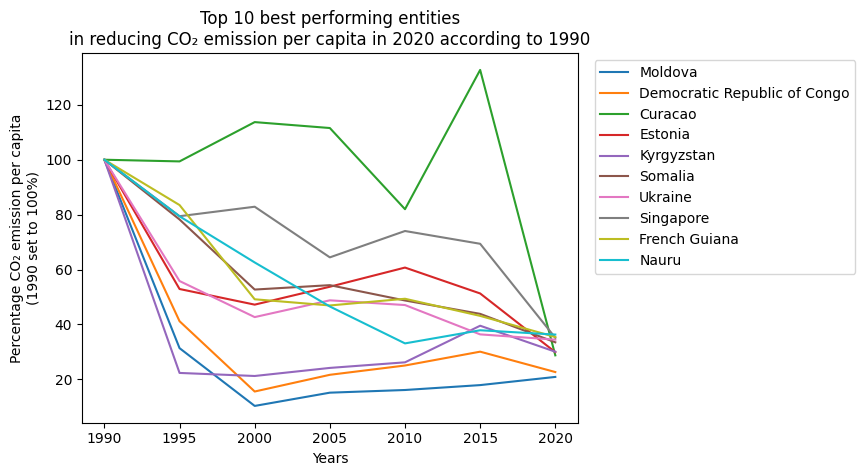

In [14]:
# show_graph(df_10_most_decreased_countries_CO2_output)
show_graph(df_top_10_q2a)

### **Q2b Decrease in relative CO₂ emission in 2020 compared to 1990, with a variabel condition for a minmal CO₂ emission in 2020**

Provide the top 10 entities that have performed the best in reducing CO₂ emission per capita in 2020 relative to the baseline year 1990, with a condition for a minmal CO₂ emission in 2020.

In the legend, the entities are listed in order of the top 10, with the country having the largest decrease first.

The condition for the minmal CO₂ emission in 2020 is set on 5 megaton for the graph below

There are 132 countries/entities with emissions >= 5 megatonnes in this dataframe.
The list of top_10_entities (q2b):
['Moldova', 'Estonia', 'Kyrgyzstan', 'Ukraine', 'Singapore', 'North Korea', 'Luxembourg', 'Syria', 'Venezuela', 'Zimbabwe']


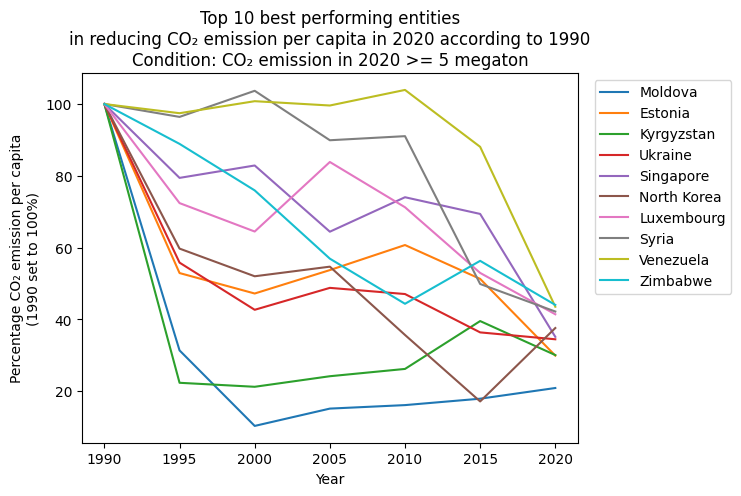

In [15]:
set_megatonnes_CO2_emission(megatonnes = 5)

### **Q2c Recent Reductions (last 1, 2, 3, 5, and 10 years) in CO₂ emissions per capita relative to 2021**

Provide the top 10 entities that have performed the best in reducing CO₂ emission per capita in the last years relative to the baseline year 2021.

In the legend, the entities are listed in order of the top 10, with the country having the largest decrease first.

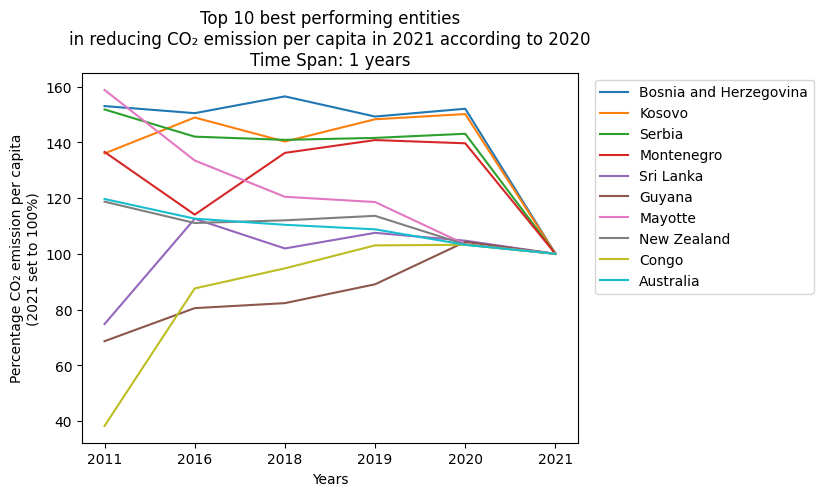

In [16]:
# Timespan one year:
show_figure_sorted_by(df_q2c, '2020', 2020)

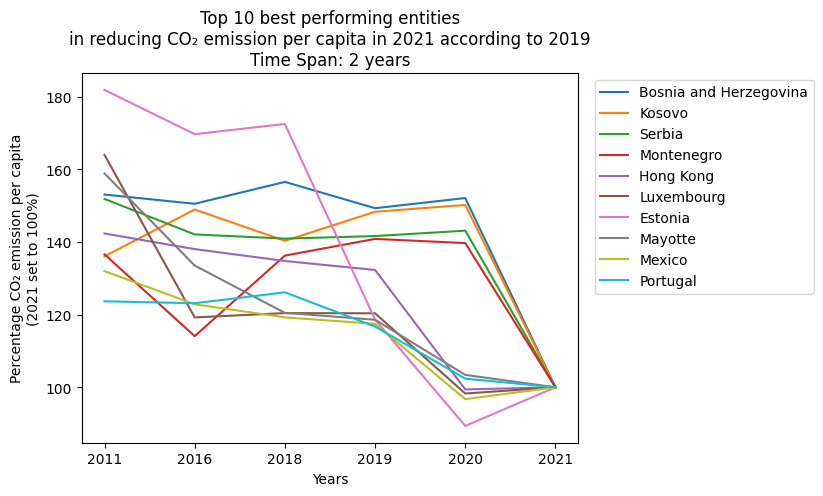

In [17]:
# Timespan two years:
show_figure_sorted_by(df_q2c, '2019', 2019)

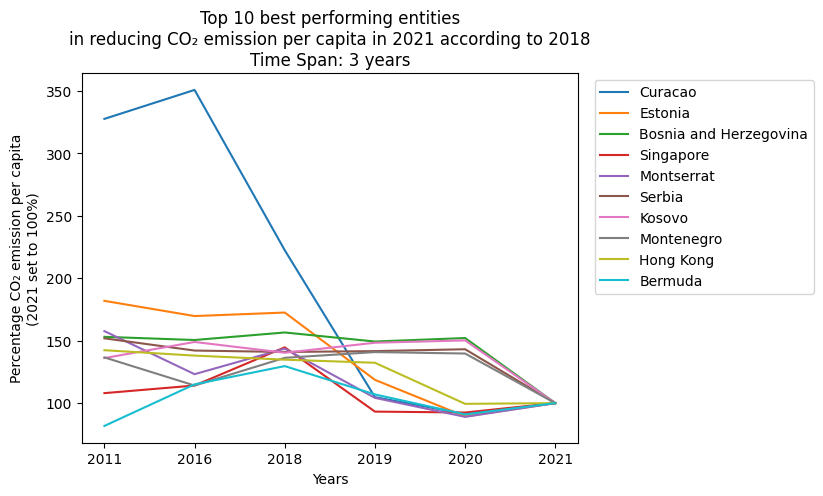

In [18]:
# Timespan three years:
show_figure_sorted_by(df_q2c, '2018', 2018)

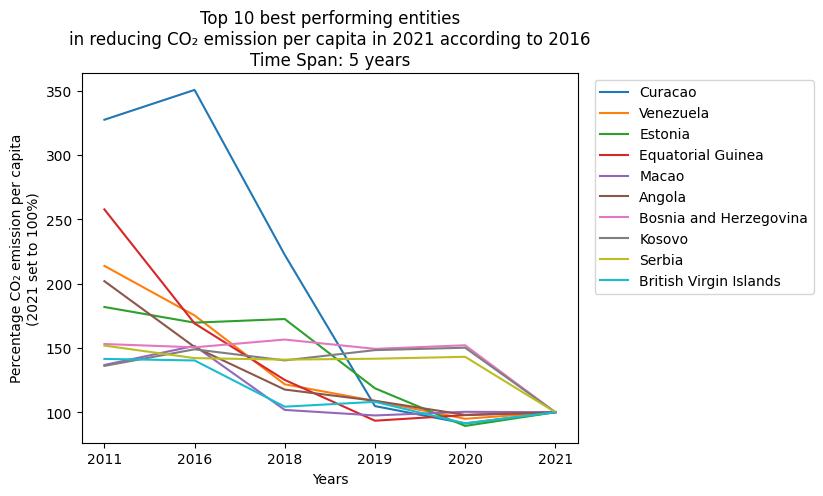

In [19]:
# Timespan five years:
show_figure_sorted_by(df_q2c, '2016', 2016)

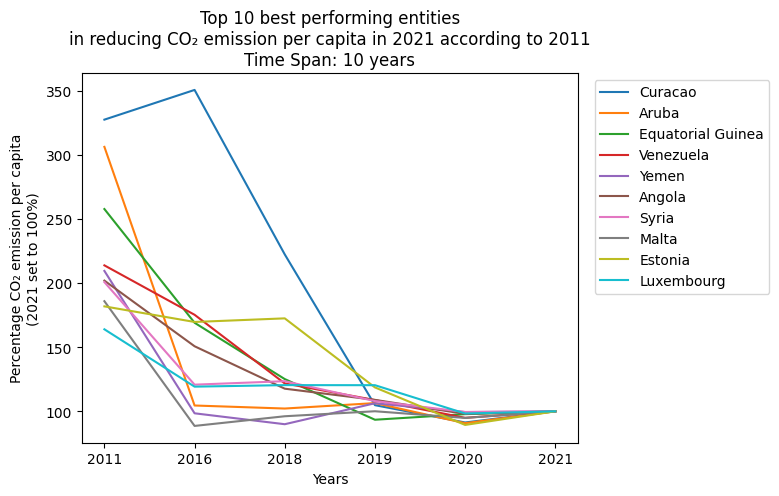

In [20]:
# Timespan ten years:
show_figure_sorted_by(df_q2c, '2011', 2011)

# **Discussion**

### **Q2a Decrease in relative CO₂ emission in 2020 compared to 1990**

Firstly, we examined the decrease in relative CO₂ emissions in 2020 compared to 1990. This choice aligns with the commitments made during the 2015 Paris Climate Agreement, which form the cornerstone of the European strategy to combat climate change. The overarching goal of the new climate legislation, effective since June 30, 2021, is to achieve a 55% reduction in CO2 emissions by 2030 relative to 1990 levels, applicable across the European Union. Notably, frontrunners have the potential to balance out laggards. (Reference: Europa Nu - https://www.europa-nu.nl/id/vhesf063wxu9/europese_aanpak_klimaatverandering)

To provide a comprehensive perspective on the trajectory of CO₂ emissions, we've chosen to assess emissions per capita for each country starting from 1990 and progressing in 5-year intervals until 2020. This approach paints a more nuanced picture of emissions trends over time, beyond merely comparing 2020 and 1990.

When comparing performances in 2020 against 1990, the following top 10 countries are identified:

1.   Moldava
2.   Democratic Republic of Congo
3.   Curacao
4.   Estonia
5.   Kyrgyzstan
6.   Somalia
7.   Ukraine
8.   Singapore
9.   French Guiana
10.  Nauru

Notably, some countries in this top 10 predominantly made significant strides in reducing CO₂ emissions per capita between 1990 and 1995/2000 (Moldova, Democratic Republic of Congo, Kyrgyzstan). However, these countries experienced a slight regression afterward. Nauru exhibits a similar pattern, with significant progress spread over a slightly extended period, between 1990 and 2005.

Ukraine and French Guiana also demonstrated substantial progress from 1990 to 1995/2000. Although these countries were unable to sustain such remarkable progress, there remains a minor progress trend in the years from 2000 onwards.

Estonia showcased two periods of substantial progress: from 1990 to 1993 and from 2018 to 2020.

Singapore and Somalia showcased progress throughout nearly all years from 1990 to 2021, with a slight dip for Somalia from 2000 to 2003. Singapore demonstrates a fairly consistent trend, with an overall steady progress. Somalia experienced considerable advancement between 1990 and 2000, followed by reasonably consistent progress from 2003 onward. Somalia's pattern also shares similarities with those of Ukraine and French Guiana. (This is best observed in the appendix graphs, where data points for all years of the different countries are considered, rather than displaying data points every 5 years.)

Curaçao made significant progress mainly from 2015 to 2019. This recent advancement earns Curaçao a spot in the top 10 for the past 30 years.

The analysis makes it clear that some countries excel over the 30-year period, with their most significant efforts concentrated in the past, while others heavily rely on recent endeavors. Additionally, some countries exhibit a more gradual progress.

### **Q2b Decrease in relative CO₂ emission in 2020 compared to 1990, with a variabel condition for a minmal CO₂ emission in 2020**
Given that the top 10 countries also include relatively low CO₂ emitters, we also examined a top 10 list comprising only those countries/entities with minimal CO₂ emissions in 2020 (under the same conditions of the previous top 10).

By setting a minimum emission threshold of 5 megatons of CO₂ emissions in 2020 (notably CO₂ emissions, not CO₂ emissions per capita), a different top 10 emerges. Democratic Republic of Congo, Curacao, Somalia, French Guiana and Nauru are no longer part of the top 10. Instead, North Korea, Luxembourg, Syria, Venezuela and Zimbabwe respectively claim positions 6 through 10. These countries also exhibit varying patterns in their achievements over the years.

### **Q2c Recent Reductions (last 1, 2, 3, 5, and 10 years) in CO₂ emissions per capita relative to 2021**

To assess recent-year performances, we considered the top 10 countries for the last 1, 2, 3, 5, and 10 years (relative to 2021, the most recent year).

Discussing the top 3 countries within each time frame provides a focused insight into their achievements:

*   Curaçao: Leading the way with significant reductions in CO₂ emissions per capita, Curaçao claimed the number one spot in the last 3, 5, and 10 years. This remarkable decline spanned from 2015 to 2019. Curaçao also managed to keep the CO₂ emissions per capita in 2020 and 2021 on the level of 2019.
*   Bosnia and Herzegovina, Kosovo, and Serbia: These three countries secured positions in the top 3 for the last year and the last 2 years, while also maintaining a presence in the top 10 for the past 3 and 5 years. Notably, their inclusion in the top list is primarily due to the substantial emission reduction observed in 2021, the latest year with available data.
>*   It is important to approach these findings with caution, as the dramatic reduction in emissions for these three countries in 2021 may be influenced by factors such as changes in measurement methods or other external influences. A single year's data may not necessarily reflect a consistent trend, and further analysis is needed to determine the sustainability of these reductions over time.
*   Aruba: Earning a notable second place in the top 10 for the last 10 years, Aruba's achievement was only driven by a substantial reduction during 2011 to 2013. However, the island's emissions have shown intriguing patterns, with levels remaining relatively constant and on the same level during 1990-1999 and 2013-2021, while witnessing a massive plateau spike 2.5 times the levels of 1990-1999 and 2013-2021 between 2000 and 2011.
*   Equatorial Guinea: Demonstrating consistent commitment, Equatorial Guinea displayed a persistent decrease in CO₂ emissions per capita throughout 2011 to 2021. It secured the third position for the 10-year timeframe and the fourth for the 5-year interval.
*   Venezuela: With a similar commitment, Venezuela showcased continuous emissions reduction from 2013 to 2020. This earned it second place for the 5-year period and fourth for the 10-year span.
*   Estonia: A reduction in CO₂ emissions per capita materialized specifically during 2018-2020 for Estonia, positioning it third for the 5-year period, seventh for the 2-year interval, and ninth for the 10-year timeline.

## **Complexity and Interpretation**
Acknowledging the complexity inherent in defining a definitive list of top-performing countries, we recognized how different criteria can lead to varying results. The range of outcomes presented a nuanced understanding of progress, reflecting the multifaceted nature of emission reduction efforts.

# **Conclusion**

For our analysis on countries that have made substantial strides in reducing CO₂ emissions per capita, we examined various approaches, we gained a comprehensive perspective on emission reduction trajectories, highlighting both historical and recent advancements. Our findings underscore the complexity of the issue and emphasize the significance of adopting multiple viewpoints to assess countries' efforts in mitigating climate change.



# **Recommendations**

### **Recommendations for further investigation**
Consider conducting an analysis that focuses on countries that have **continuously** shown a decrease in CO₂ emissions over an extended period, such as the past 5, 10, or 15 years. This would help identify countries that are not just reacting to short-term changes but are actively implementing long-term strategies for emissions reduction.

### **Recommendations for Presentation**
To enhance presentation accuracy, we recommend displaying graphs with data points for each year, providing a clearer representation of emission trajectories. This adjustment would allow for more precise observations of countries' progress patterns.

# **Reference**

Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-greenhouse-gas-emissions' [Online Resource]

# **Appendix**

The appendix contains graphs illustrating the annual CO₂ emissions in tonnes per capita for each individual country from 1990 to 2021. This provides a broader perspective on the countries mentioned in question 2.

The presentation follows this sequence:

*   First, the countries within the top 10 of q2a are displayed.
*   Second, the countries in the top 10 of q2b (excluding those already in q2a) are shown.
*   Third, the countries within the top 3 of each timeframe discussed in q2c are presented.
*   Lastly, some additional countries that are not part of the different top 3 lists of q2c are featured, but are present in some top 10 list of q2c.


### **Q2a Top 10 countries: Decrease in relative CO₂ emission in 2020 compared to 1990**

In [21]:
list_countries_top_10_q2a

['Moldova',
 'Democratic Republic of Congo',
 'Curacao',
 'Estonia',
 'Kyrgyzstan',
 'Somalia',
 'Ukraine',
 'Singapore',
 'French Guiana',
 'Nauru']

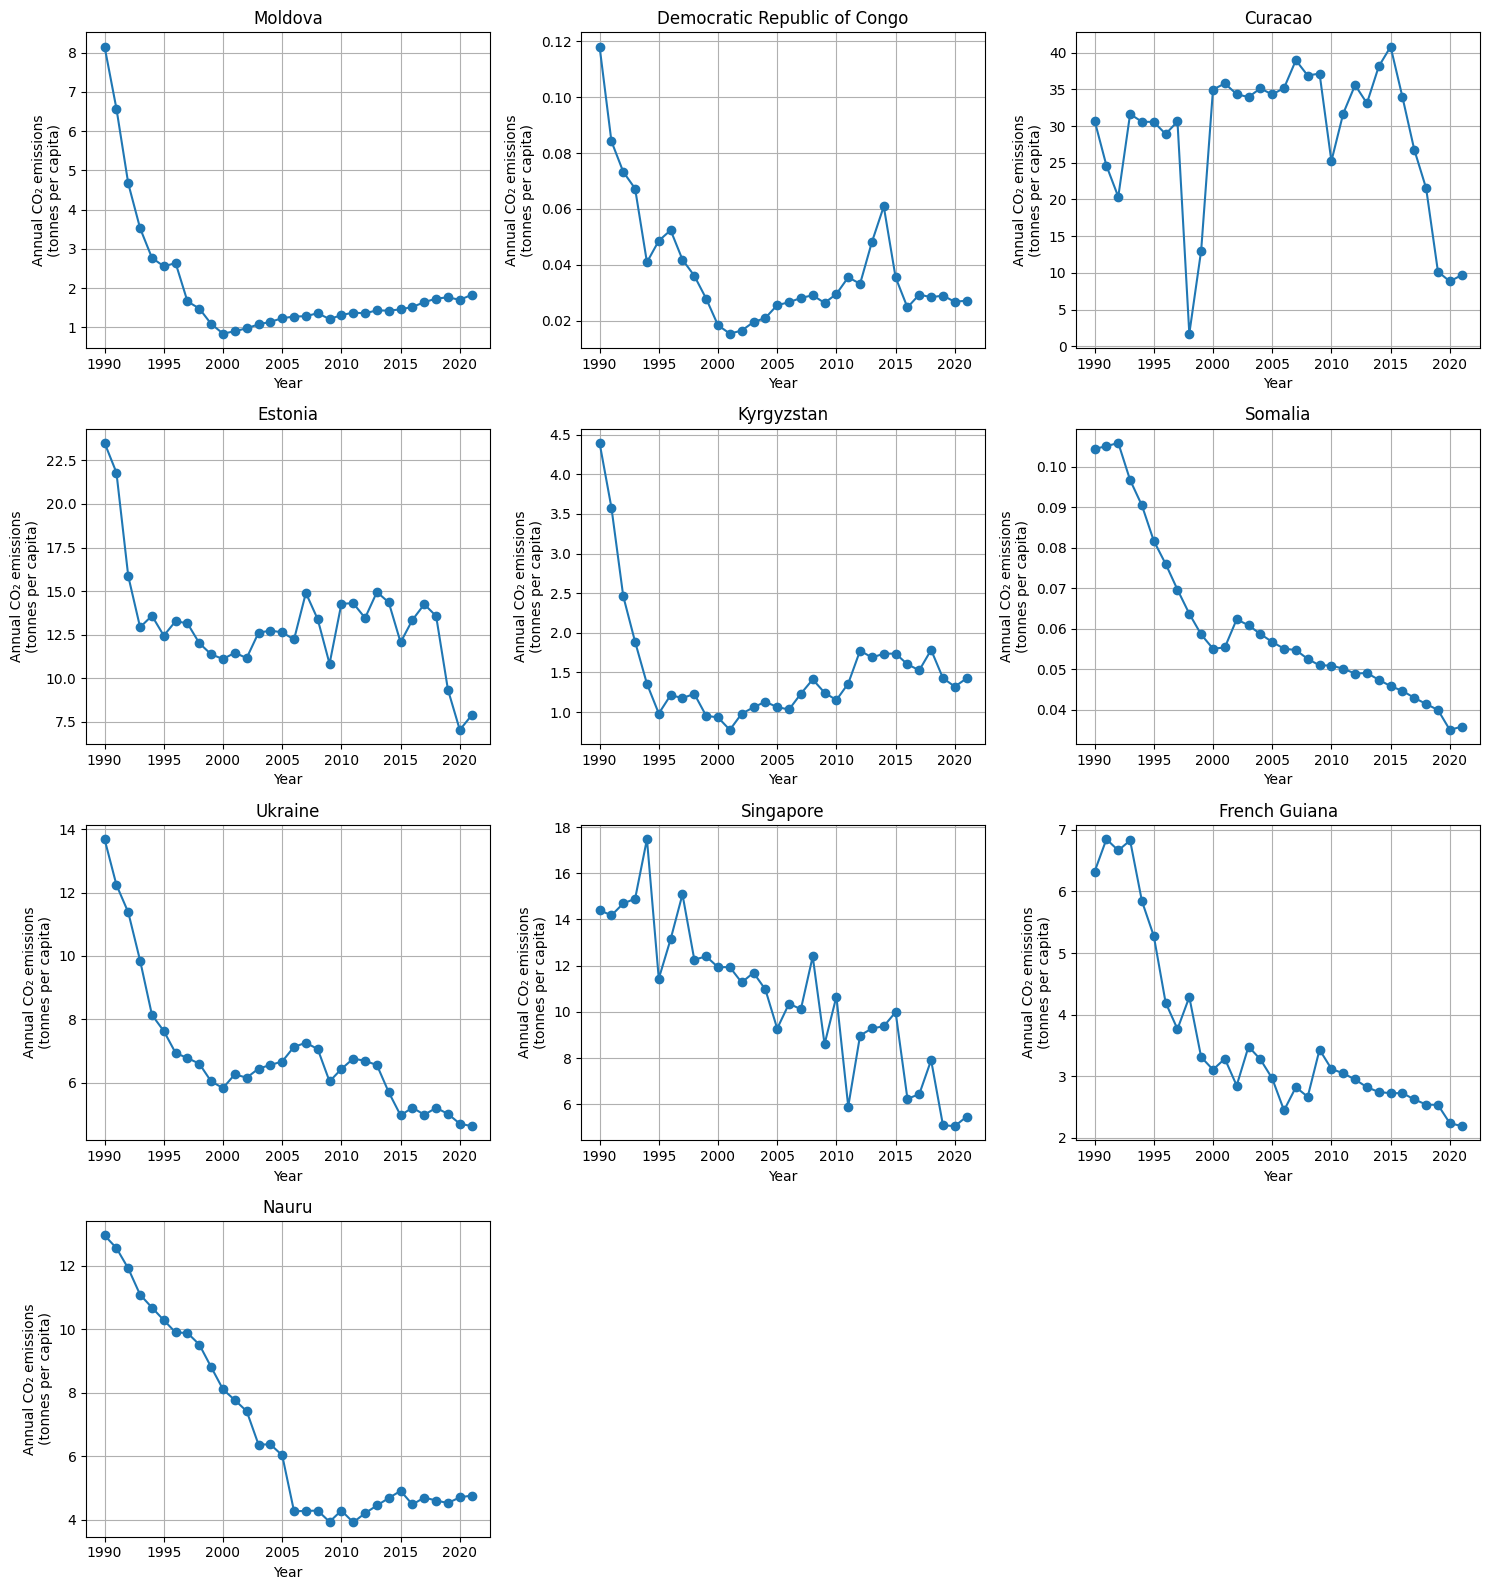

In [22]:
show_graphs_of_countries(list_countries_top_10_q2a)

### **Q2b Top 10 countries: Decrease in relative CO₂ emission in 2020 compared to 1990, with a condition for a minmal CO₂ emission in 2020 (>= 5 megatonnes)**

Only the countries that have not been displayed above are shown.

In [23]:
list_countries_top_10_q2b = ['Moldova', 'Estonia', 'Kyrgyzstan', 'Ukraine', 'Singapore', 'North Korea', 'Luxembourg', 'Syria', 'Venezuela', 'Zimbabwe']
# Show a list of entities which are in list_top_10_entities_q2b, but not in list_top_10_entities_q2a
in_list_q2b_not_in_list_q2a = [item for item in list_countries_top_10_q2b if item not in list_countries_top_10_q2a]
in_list_q2b_not_in_list_q2a

['North Korea', 'Luxembourg', 'Syria', 'Venezuela', 'Zimbabwe']

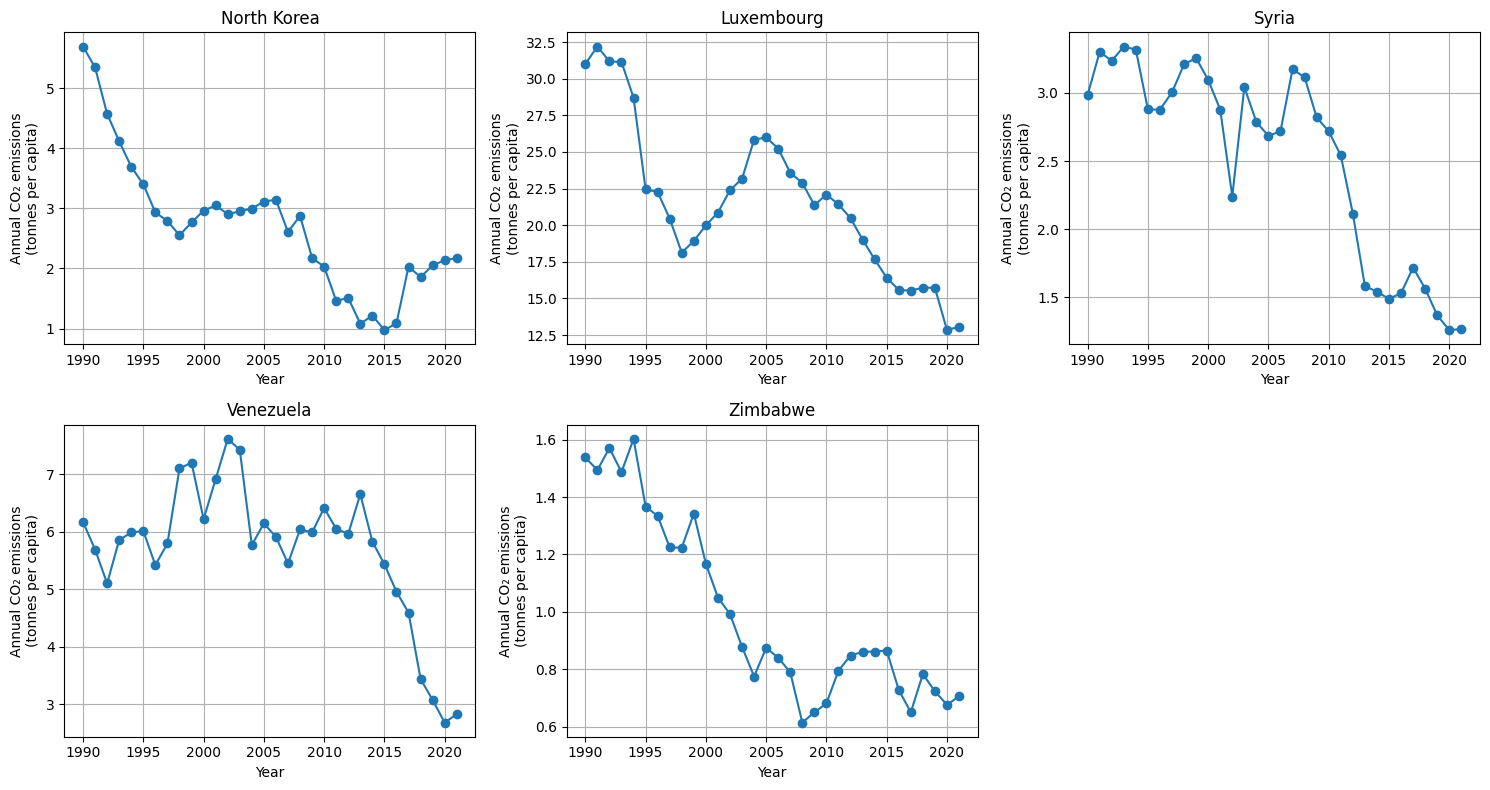

In [24]:
show_graphs_of_countries(in_list_q2b_not_in_list_q2a)

In [25]:
# Countries, which are not longer present in the top 10 (q2a in accordance to q2b)
in_list_q2a_not_in_list_q2b = [item for item in list_countries_top_10_q2a if item not in list_countries_top_10_q2b]
in_list_q2a_not_in_list_q2b

['Democratic Republic of Congo',
 'Curacao',
 'Somalia',
 'French Guiana',
 'Nauru']

In [26]:
print(list_countries_top_10_q2a)
print(in_list_q2b_not_in_list_q2a)

['Moldova', 'Democratic Republic of Congo', 'Curacao', 'Estonia', 'Kyrgyzstan', 'Somalia', 'Ukraine', 'Singapore', 'French Guiana', 'Nauru']
['North Korea', 'Luxembourg', 'Syria', 'Venezuela', 'Zimbabwe']


### **Q2c Top 3 countries: Recent Reductions (last 1, 2, 3, 5, and 10 years) in CO₂ emissions per capita relative to 2021**

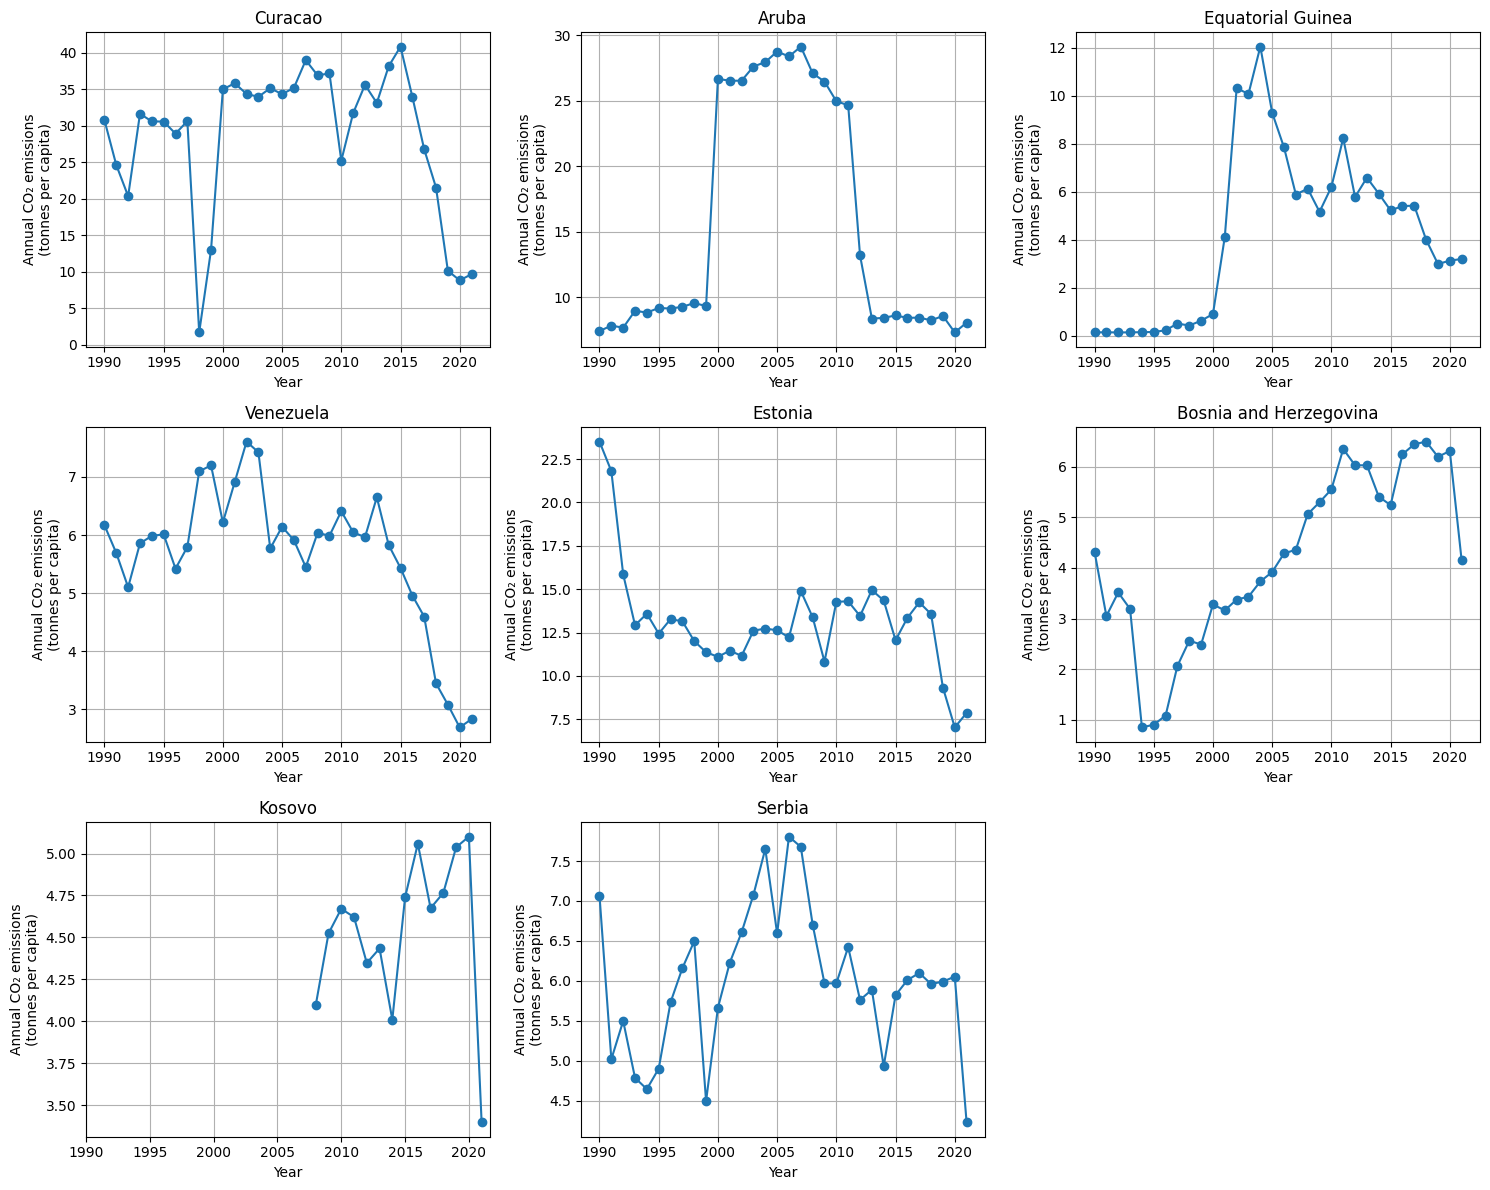

In [27]:
list_all_top_3_countries_q2c = ['Curacao', 'Aruba', 'Equatorial Guinea', 'Venezuela', 'Estonia', 'Bosnia and Herzegovina', 'Kosovo', 'Serbia']
show_graphs_of_countries(list_all_top_3_countries_q2c)

### **Q2c Some other countries, not in Top 3: Recent Reductions (last 1, 2, 3, 5, and 10 years) in CO₂ emissions per capita relative to 2021**

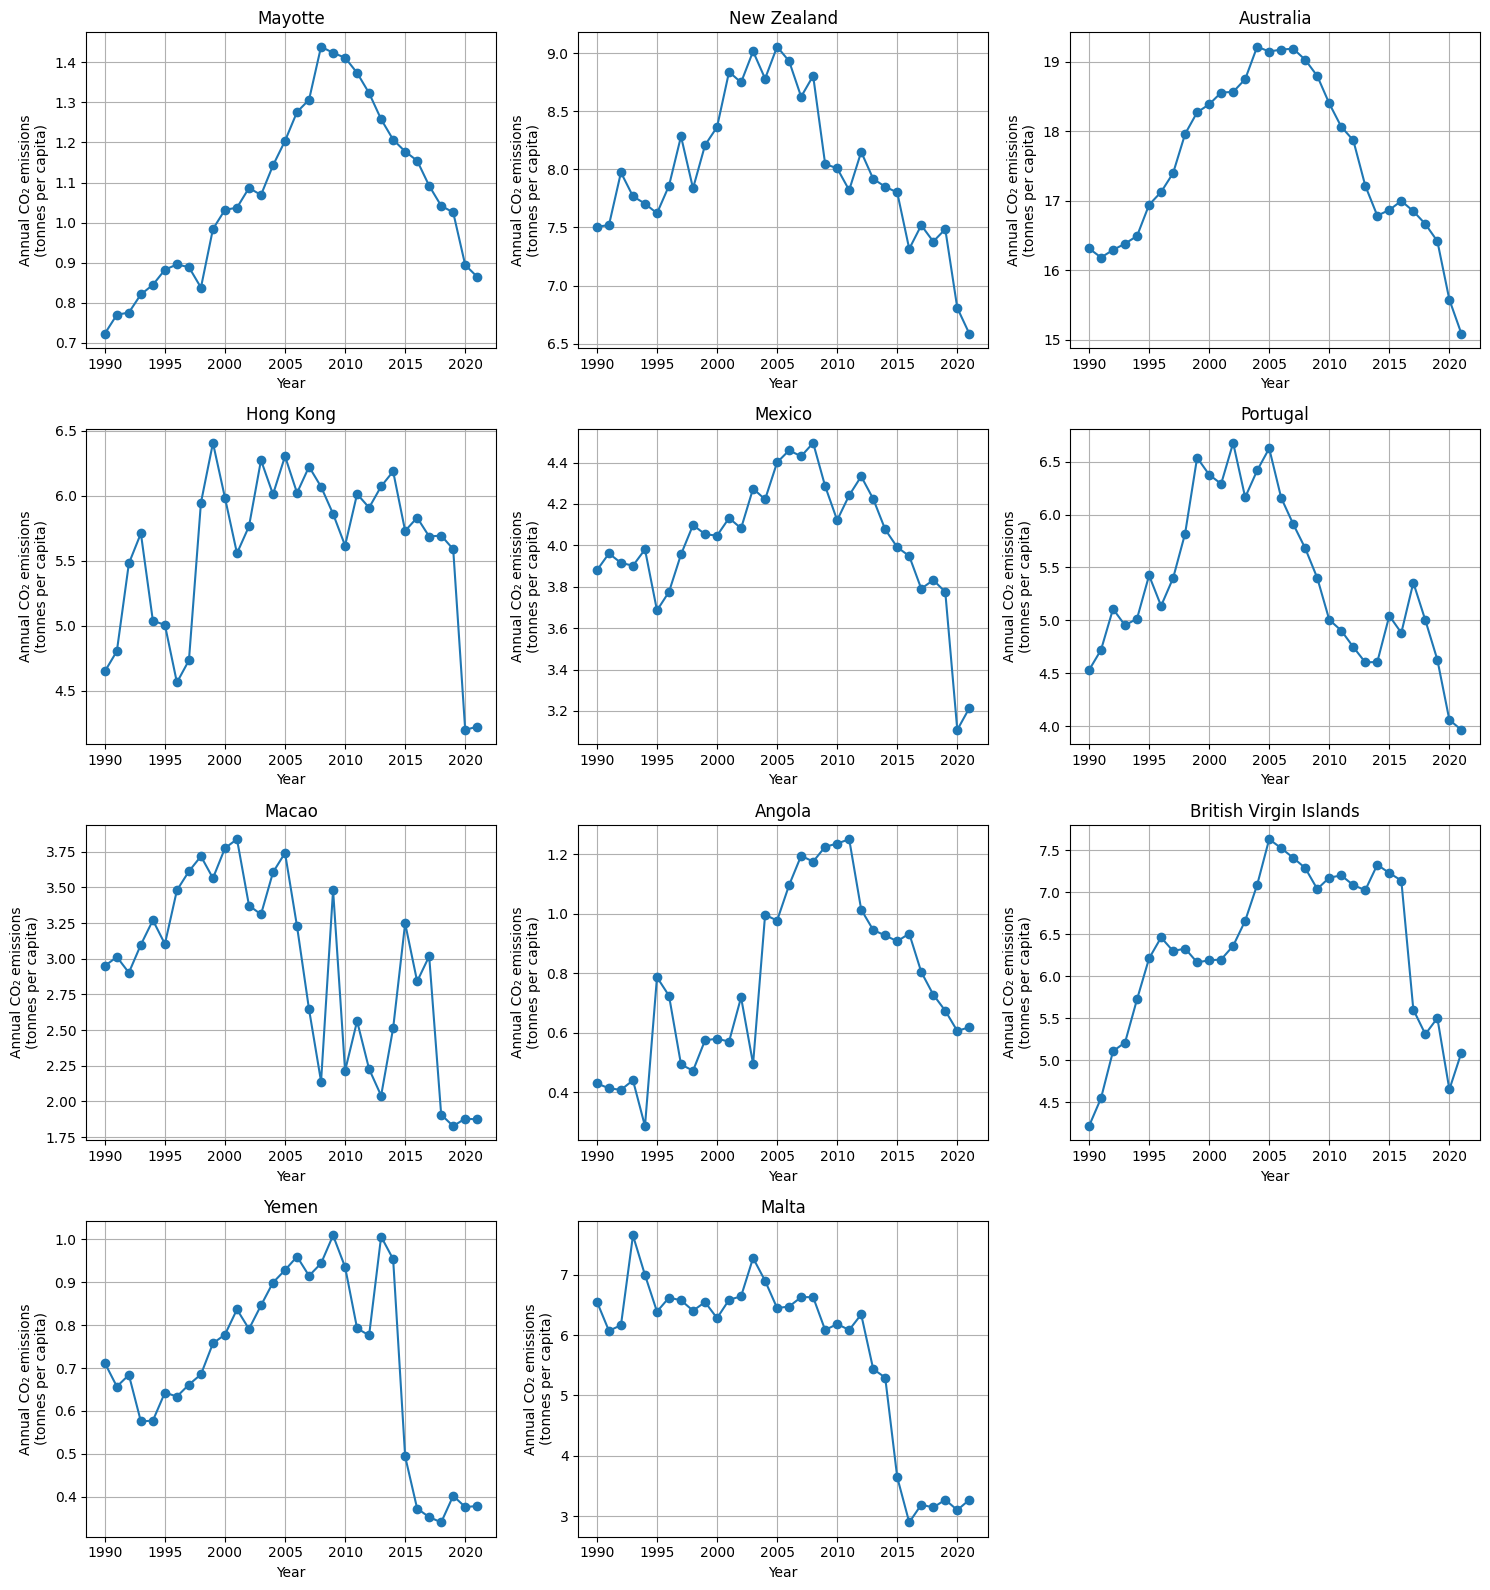

In [28]:
# Some other countries present in the top 10 of q2c
list_q2c_some_other_countries = ['Mayotte', 'New Zealand', 'Australia', 'Hong Kong', 'Mexico',
            'Portugal', 'Macao', 'Angola', 'British Virgin Islands', 'Yemen',
            'Malta']
show_graphs_of_countries(list_q2c_some_other_countries)